<a href="https://colab.research.google.com/github/RodrigoGuedesDP/IA/blob/main/maestria_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Título:
Diseño, Implementación y Evaluación de una Red Neuronal MLP para la Clasificación de Rostros

----

# Descripción:
En este hackathon, cada equipo desarrollarán un modelo de red neuronal de tipo Perceptrón Multicapa (MLP) utilizando PyTorch para clasificar una base de datos de imágenes de rostros. La base de datos consta de 2,410 imágenes, cada imagen está representada como un vector de  dimensión de 32256. Las imágenes corresponden a 38 personas diferentes, donde cada persona tiene múltiples fotografías. El objetivo principal es explorar diferentes configuraciones del modelo ajustando el número de neuronas en una capa oculta y utilizando distintas funciones de activación. A través de estas pruebas, los estudiantes analizarán el impacto de los hiperparámetros en el rendimiento del modelo, implementarán modificaciones en el código base provisto y presentarán una evaluación cuantitativa de los resultados.

----

# Objetivos:
## General:

Diseñar, implementar y evaluar una red neuronal MLP en PyTorch para la clasificación de imágenes de rostros.
## Específicos:
- Convertir y preparar los datos de imágenes en un formato adecuado para el entrenamiento del modelo.
- Implementar una red neuronal MLP con una sola capa oculta y explorar el impacto del número de neuronas en el rendimiento del modelo.
- Experimentar con diferentes funciones de activación, como ReLU, Sigmoid y Tanh, para observar sus efectos en la clasificación.
- Implementar y completar el código base provisto, asegurando que sea funcional y eficiente.
- Entrenar y evaluar múltiples configuraciones de la red neuronal utilizando métricas como accuracy, recall, precision y F1 score.
- Comparar los resultados de las distintas configuraciones y determinar cuál ofrece el mejor desempeño.
- Presentar los resultados en tablas y gráficas, explicando las conclusiones obtenidas.

## Base de Datos:

Link: [Aquí](https://drive.google.com/file/d/1X8-AJiG0_qW08rx5l8u1Vs3cmx5W8ETj/view?usp=sharing)


**Para aprender, debemos entrenar nuestra propia red neuronal. No dependas de herramientas como ChatGPT o sus variantes. Entrena tu cerebro, equivócate, identifica los errores y aprende de ellos, tal como lo haría una red neuronal MLP gigante.**

----

Mucha suerte y divierntanse aprendiendo. 😊😊😊

# 1. Librerías Necesarias

In [1]:
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Cargando datos de Archivo

La función load_data carga todas las imágenes de un archivo .m.
No se preocupe por eso, se hará de forma transparente para usted.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import seaborn as sns
from google.colab import drive

math_path = '/content/allFaces.mat'
def Load_data(file):
  faces_m_format = scipy.io.loadmat(math_path)
  faces = faces_m_format['faces']
  m = int(faces_m_format['m'])
  n = int(faces_m_format['n'])
  nfaces = np.ndarray.flatten(faces_m_format['nfaces'])
  y = np.zeros((faces.shape[1],))
  j = 0
  classes = list(range(len(nfaces)))
  for i in nfaces:
    y[j:j+i] = classes.pop(0)
    j = j + i
  print(faces_m_format.keys())
  print("Total dataset size:")
  print(f"n_samples: {faces.shape[1]}")
  print(f"n_features: {m*n}")
  print(f"n_classes: {len(nfaces)}")
  return faces, y,m,n

X,Y,m,n = Load_data(math_path)



dict_keys(['__header__', '__version__', '__globals__', 'faces', 'n', 'm', 'sub', 'nfaces', 'person'])
Total dataset size:
n_samples: 2410
n_features: 32256
n_classes: 38


/tmp/ipython-input-2874447351.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  m = int(faces_m_format['m'])
/tmp/ipython-input-2874447351.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  n = int(faces_m_format['n'])
/tmp/ipython-input-2874447351.py:18: RuntimeWarning: overflow encountered in scalar add
  y[j:j+i] = classes.pop(0)
/tmp/ipython-input-2874447351.py:19: RuntimeWarning: overflow encountered in scalar add
  j = j + i


## Funciones Utilitarias.
La función Plot_Face se ha implementado para que pueda ver una imagen de su base de datos.

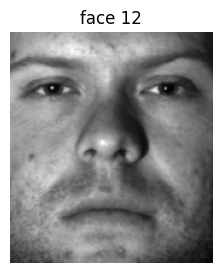

(32256, 2410)

In [3]:
def Plot_Face(image_vec, i,title):
  fig1 = plt.figure(figsize=(10, 3))
  image = image_vec.reshape((m,n))
  img = plt.imshow(image.T)
  img.set_cmap('gray')
  plt.title(title  + str(i))
  plt.axis('off')
  plt.show()


number_image = 12
image_vec = X.T[number_image]
Plot_Face(image_vec,number_image,'face ')
X.shape

# 3. Reducción de la dimensionalidad

Completa el código para que sea funcional y permita reducir los datos, asegurando que se conserve el 95% de la varianza explicada.

In [5]:
import numpy as np
from sklearn.decomposition import PCA

pca=PCA(n_components = 0.95)
X_pca= pca.fit_transform(X.T)
X_pca.shape

(2410, 62)

# 4. Separación de datos en train y test.
Complete el código usando la libreria train_test_split

1.  Divide los datos en conjuntos de entrenamiento y prueba utilizando train_test_split con un 25% para prueba.
2.  Recuerda que los datos a dividir son X_pca y Y.
3. Convierte los datos a tensores para que PyTorch pueda procesarlos correctamente.
4. Crear los dataloader para entrerar y testear el modelo. Se da un ejemplo.


In [6]:
# Escriba su código aquí para separar la data
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.25, random_state=42)

In [8]:
# Convierte tus datos a tensores.
# A continuación, te doy un ejemplo para X_test y Y_test.

x_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.long)



In [9]:
# Crear TensorDataset y DataLoader. Te pongo un ejemplo para el test
dataset_test = TensorDataset(x_test_t, y_test_t)
batch_size = 16
data_loader_test = DataLoader(dataset_test, batch_size=batch_size, shuffle=False)

# 5. Modelo

Crea tu modelo MLP utilizando una  capa. Puedes experimentar con el número de neuronas en esa capa y las funciones de activación.

In [ ]:
# Crea aquí tu modelo
class Modelo_MLP(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(Modelo_MLP, self).__init__()



    # Escribe el código que falta

# 6. Configuración de Parámetros
Configura los parámetros de tu modelo

In [ ]:
# Parámetros del modelo
input_size = ?
hidden_sizes = [?]
output_size = ?
epochs = ?

model = Modelo_MLP(input_size, hidden_sizes, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)



# 7. Entrenamiento.
Completar el código que falta para que la función se ejecute correctamente.

In [ ]:
# Función de entrenamiento
def train(model, criterion, optimizer, data_loader, epochs):
    model.train()
    for epoch in range(epochs):
        total_loss = 0.0
        for x_batch, y_batch in data_loader:
          # Completa para que funcione
        print(f"Época {epoch + 1}/{epochs}, Pérdida promedio: {total_loss / len(data_loader)}")

# 8. Testing
Completa el código necesario para evaluar tu modelo.
Se solicita que ajustes algunos hiperparámetros para crear al menos 3 modelos diferentes y mostrar sus resultados en una tabla.

In [ ]:
def evaluate(model, data_loader):
    model.eval()
    y_pred = []
    y_reañ = []
    with torch.no_grad():
        for x_batch, y_batch in data_loader:
            # completa para evaluar los datos de test



    # Métricas
    accuracy = accuracy_score(y_real, y_pred)
    # Completa con las métricas que se te piden.
    # Precision, Recall y F1_Score.


# 9. Ejecutando y evaluando el modelo
- Si el código anterior es correcto, el siguiente fragmento debería ejecutarse sin problemas.
- El entrenamiento del modelo puede tardar entre 5 y 10 minutos, por lo que se recomienda tener paciencia.
- Sugerencia: cada miembro del equipo puede probar configuraciones diferentes del modelo y, posteriormente, reunir los resultados en una tabla única para evaluar cuál ofrece el mejor desempeño.


In [ ]:
train(model, criterion, optimizer, data_loader_train, epochs)
evaluate(model, data_loader_test)

Configura tu red, con diferentes número de neuronas y cambia las funciones de activación y genera
una tabla, con los siguientes datos

Esta es sólo una tabla de ejemplo:

----
| Neuronas Hidden | Tipo de Función de Activación | Número de Épocas | Accuracy | Recall | Precision | F1_Score |
|------------------|-------------------------------|------------------|----------|--------|-----------|----------|
| 64, 32          | ReLU                          | 10               | 0.85     | 0.84   | 0.86      | 0.85     |
| 128, 64         | Tanh                          | 20               | 0.89     | 0.88   | 0.90      | 0.89     |
| 256, 128        | Sigmoid                       | 15               | 0.83     | 0.82   | 0.84      | 0.83     |
| 512, 256        | ReLU                          | 30               | 0.91     | 0.90   | 0.92      | 0.91     |

-----